# QF 627 Extras - Financial Analytics
## Lesson 9 | Introduction to Unsupervised Learning with Clustering

> Hi, Team 👋 Thank you for opening the lecture note 🙂

> Tonight, we will learn modeling for prediction purposes (solving y-hat questions). In particular, we will focus on the clustering algorithm.
>
> As always, I'll unpack how the clustering algorithm operates and provide a comprehensive explanation of how machines learn from data using clustering algorithms.

> Our focal point of interest in this class is learning the k-means clustering algorithm, which is one of the key algorithms in clustering. We will then explore two use cases of clustering for analytics in finance and real estate.

### Workflow

* Define
* Collect
* Import
* Wrangle
* Visualize
* Model
* Report
* Deploy

## DEPENDENCIES

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime
import re

# for commenting purposes

# import altair as alt
# import plotly.express as px
# import xlrd

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(230204)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

# Define our customized timer function

def countdown(Time):
    
    while Time:
        minutes, seconds = divmod(Time, 60)
        timer = "{:02d}:{:02d}".format(minutes, seconds)
        
        print(timer, end = "\r")
        time.sleep(1)
        Time -= 1
        
    print("Let us solve the problem above together :)")

In [2]:
%whos

Variable    Type        Data/Info
---------------------------------
countdown   function    <function countdown at 0x103dd4fe0>
datetime    module      <module 'datetime' from '<...>/python3.13/datetime.py'>
mpl         module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np          module      <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
pd          module      <module 'pandas' from '/o<...>ages/pandas/__init__.py'>
plt         module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
re          module      <module 're' from '/opt/h<...>thon3.13/re/__init__.py'>
sm          module      <module 'statsmodels.api'<...>ages/statsmodels/api.py'>
sns         module      <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
time        module      <module 'time' (built-in)>
warnings    module      <module 'warnings' from '<...>/python3.13/warnings.py'>


## 👉 <a id = "top">Learning Pointers</a> 👈 

## [1. Clustering Credit Card Customers for Banks](#p1)

> ### <font color = red> Clustering for Analytics in Finance </font>

## [2. Clustering for Mapping Singapore Condominium Rental Prices](#p2)

> ### <font color = red> Clustering for Analytics in Real Estate </font>

## [3. What We Learned](#p7)

> ### <font color = red> Revisiting Learning Pointers </font>


## <a id = "p1">1. </a> <font color = "green"> Clustering Credit Cart Customers for Banks </font>  [back to table of contents](#top)

### Defining Analytic Question: Your Business & Machine Learning Questions 😊

> You are a data scientist at a major bank, and you have been tasked with analyzing the behavior and preferences of credit card customers. The goal is to identify distinct customer segments to tailor marketing strategies, improve customer service, and enhance product offerings. You have a dataset containing various attributes of customer behavior and demographics.

### Dataset Description

> The dataset includes the following variables for each customer:

- `customer_id`: A unique identifier for each customer (row index).
- `incomeSGD`: The household income of the respondent in Singapore Dollars.
- `n_visits`: The number of times the customer visits the bank's partnered stores.
- `survey1`: Response to the statement "Shopping is fun" (Likert scale).
- `survey2`: Response to the statement "Shopping is bad for your budget" (Likert scale).
- `survey3`: Response to the statement "I combine shopping with eating out" (Likert scale).
- `survey4`: Response to the statement "I try to get the best buys while shopping" (Likert scale).
- `survey5`: Response to the statement "I don't care about shopping" (Likert scale).
- `survey6`: Response to the statement "You can save a lot of money by comparing prices" (Likert scale).

### Goal of Analytic Task

> The objective is to segment the credit card customers into distinct groups based on their income, shopping behavior, and attitudes towards shopping. By identifying these segments, the bank can develop targeted marketing campaigns, design personalized credit card offers, and improve overall customer satisfaction.

In [3]:
### IMPORT

url = "https://talktoroh.squarespace.com/s/credit_card-f29n.csv"

df =\
(
    pd
    .read_csv(url)
)

In [4]:
df.head(3)

,customer_id,incomeSGD,n_visits,survey1,survey2,survey3,survey4,survey5,survey6
0,1,60000,3,6,4,7,3,2,3
1,2,30000,1,2,3,1,4,5,4
2,3,70000,3,7,2,6,4,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  400 non-null    int64
 1   incomeSGD    400 non-null    int64
 2   n_visits     400 non-null    int64
 3   survey1      400 non-null    int64
 4   survey2      400 non-null    int64
 5   survey3      400 non-null    int64
 6   survey4      400 non-null    int64
 7   survey5      400 non-null    int64
 8   survey6      400 non-null    int64
dtypes: int64(9)
memory usage: 28.3 KB


### Check your data for missing values.

In [6]:
# column-wise missing values
(
    df 
    .isnull() # bools (True = 1; False = 0)
    .sum()
)

customer_id    0
incomeSGD      0
n_visits       0
survey1        0
survey2        0
survey3        0
survey4        0
survey5        0
survey6        0
dtype: int64

### Standardize the scales of your variables.

In [7]:
df.columns

Index(['customer_id', 'incomeSGD', 'n_visits', 'survey1', 'survey2', 'survey3',
       'survey4', 'survey5', 'survey6'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# assign scaler
scaler = StandardScaler() # in the field practice, you will use (deploy) many different kinds of scalers

# subset variables (attributes) to use
attributes_to_scale =\
(
    df
    .columns[1: ]
)

In [10]:
df_z =\
    df \
    .copy()

In [11]:
df_z[attributes_to_scale] =\
    scaler \
    .fit_transform(df_z[attributes_to_scale]
                  )

In [12]:
(df_z
 [attributes_to_scale]
 .describe()
)

,incomeSGD,n_visits,survey1,survey2,survey3,survey4,survey5,survey6
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,2.220446e-18,4.440892e-17,1.154632e-16,-2.398082e-16,9.436896e-17,-1.176836e-16,8.881784e-18,2.209344e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.235294e+00,-1.692456e+00,-1.859444e+00,-2.013489e+00,-1.867708e+00,-1.955604e+00,-1.835824e+00,-2.072050e+00
25%,-9.411765e-01,-6.509446e-01,-8.865498e-01,-7.350832e-01,-9.062107e-01,-7.109872e-01,-7.677080e-01,-8.576618e-01
50%,-2.058824e-01,-1.301889e-01,8.634435e-02,-9.588042e-02,5.528607e-02,-8.867893e-02,-2.336503e-01,-2.504676e-01
75%,8.235294e-01,5.207556e-01,5.727914e-01,5.433224e-01,1.016783e+00,5.336294e-01,8.344653e-01,3.567266e-01
max,2.000000e+00,1.952834e+00,2.032133e+00,2.460931e+00,1.978280e+00,2.400554e+00,2.436639e+00,2.178309e+00


### Implement `K-Means` Clustering

In [13]:
from sklearn.cluster import KMeans

In [14]:
# initiate KMeans
algo =\
    KMeans(n_clusters = 3,
           random_state = 627)

# fit
algo \
    .fit(df_z
         [attributes_to_scale]
        )

# predict 
df_z["assigned_clusters"] =\
(
    algo
    .predict(df_z
             [attributes_to_scale]
             )
)

df_z

,customer_id,incomeSGD,n_visits,survey1,survey2,survey3,survey4,survey5,survey6,assigned_clusters
0,1,0.823529,-0.130189,1.059238,-0.095880,1.497531,-0.710987,-0.767708,-0.857662,0
1,2,-0.941176,-1.171700,-0.886550,-0.735083,-1.386959,-0.088679,0.834465,-0.250468,2
2,3,1.411765,-0.130189,1.545686,-1.374286,1.016783,-0.088679,-1.301766,-0.857662,0
3,4,-0.941176,1.952834,0.086344,1.182525,0.055286,0.533629,-0.233650,0.963921,1
4,5,0.823529,-1.171700,-1.372997,-0.735083,-0.906211,-1.333296,1.368523,-0.250468,2
...,...,...,...,...,...,...,...,...,...,...
395,396,-0.352941,0.390567,-0.400103,0.543322,-0.425462,1.155938,0.834465,2.178309,1
396,397,2.000000,0.390567,0.572791,-0.735083,1.497531,-1.333296,-0.233650,0.963921,0
397,398,-1.235294,0.911322,-0.886550,1.182525,-0.425462,1.155938,0.300407,-0.857662,1
398,399,-0.941176,1.432078,0.572791,1.821728,-0.425462,1.778246,-1.301766,2.178309,1


### How to find optimal number of clusters in the first place

In [15]:
WSS = [] # inertia scores; distortion scores

for K in range(2, 11):
    inertia =\
        KMeans(n_clusters = K,
               random_state = 231101) \
        .fit(df_z
             [attributes_to_scale]
            ) \
        .inertia_
        
    WSS.append(inertia)

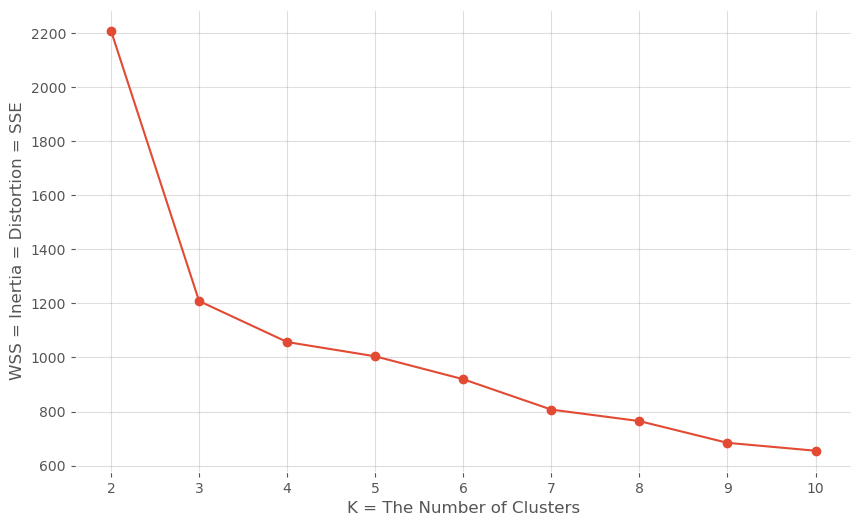

In [16]:
# Elbow Plot

plt.figure(figsize = [10, 6]
          )

plt.plot(range(2, 11),
         WSS,
         "o-")

plt.xlabel("K = The Number of Clusters")
plt.ylabel("WSS = Inertia = Distortion = SSE")

plt.show()

### Visualize the three clusters using the two principal components that explain the most variance in your variables. In other words, `reduce the dimensions of your features` and display your data points along these `two` reduced dimensions, showcasing the three clusters.

In [17]:
### Dependencies for Principal Component Analysis (A dimensionality reduction algo)

In [18]:
from sklearn import decomposition

In [19]:
%whos

Variable              Type              Data/Info
-------------------------------------------------
K                     int               10
KMeans                ABCMeta           <class 'sklearn.cluster._kmeans.KMeans'>
StandardScaler        type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
WSS                   list              n=9
algo                  KMeans            KMeans(n_clusters=3, random_state=627)
attributes_to_scale   Index             Index(['incomeSGD', 'n_vi<...>],\n      dtype='object')
countdown             function          <function countdown at 0x103dd4fe0>
datetime              module            <module 'datetime' from '<...>/python3.13/datetime.py'>
decomposition         module            <module 'sklearn.decompos<...>composition/__init__.py'>
df                    DataFrame              customer_id  incomeS<...>n\n[400 rows x 9 columns]
df_z                  DataFrame              customer_id  incomeS<...>\n[400 rows x 10 columns]
i

In [20]:
# Initialization
pca =\
    decomposition \
    .PCA(n_components = 2)

# Store PCA outcomes 
pca_outcomes =\
    pca \
    .fit_transform(df_z
                   [attributes_to_scale]
                  )

# Store PCs
df_z["PC1"] =\
    pca_outcomes[ : , 0]

df_z["PC2"] =\
    pca_outcomes[ : , 1]

df_z.head(3)

,customer_id,incomeSGD,n_visits,survey1,survey2,survey3,survey4,survey5,survey6,assigned_clusters,PC1,PC2
0,1,0.823529,-0.130189,1.059238,-0.095880,1.497531,-0.710987,-0.767708,-0.857662,0,2.006697,-1.114008
1,2,-0.941176,-1.171700,-0.886550,-0.735083,-1.386959,-0.088679,0.834465,-0.250468,2,-0.576386,2.263960
2,3,1.411765,-0.130189,1.545686,-1.374286,1.016783,-0.088679,-1.301766,-0.857662,0,2.528317,-1.257330


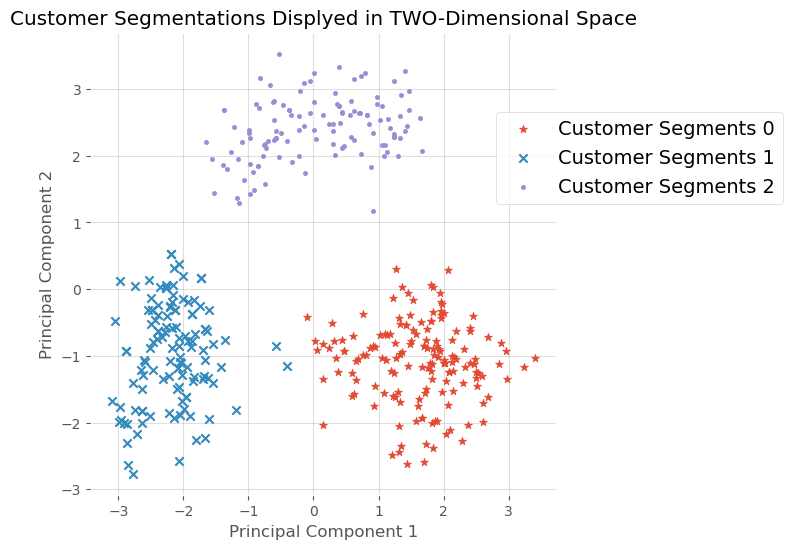

In [21]:
plt.figure(figsize = [6, 6]
          )

markers = ["*", "x", "."]

for cluster in range(3):
    
    placeholder = df_z[df_z.assigned_clusters == cluster]

    plt.scatter(x = placeholder.PC1,
                y = placeholder.PC2,
                marker = markers[cluster],
                label = "Customer Segments " + str(cluster)
               )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.title("Customer Segmentations Displyed in TWO-Dimensional Space")

plt.legend(bbox_to_anchor = (0.85, 0.85)
          )

plt.show()

### Perform a `profiling` analysis. Then, `provide a description` of `each profile` using a `markdown cell`. What `strategies would you recommend` for targeting each of the customer segments?


In [22]:
df_z.head(3)

,customer_id,incomeSGD,n_visits,survey1,survey2,survey3,survey4,survey5,survey6,assigned_clusters,PC1,PC2
0,1,0.823529,-0.130189,1.059238,-0.095880,1.497531,-0.710987,-0.767708,-0.857662,0,2.006697,-1.114008
1,2,-0.941176,-1.171700,-0.886550,-0.735083,-1.386959,-0.088679,0.834465,-0.250468,2,-0.576386,2.263960
2,3,1.411765,-0.130189,1.545686,-1.374286,1.016783,-0.088679,-1.301766,-0.857662,0,2.528317,-1.257330


In [23]:
# UGLY visual display of profiling (persona) analysis

In [24]:
%whos

Variable              Type              Data/Info
-------------------------------------------------
K                     int               10
KMeans                ABCMeta           <class 'sklearn.cluster._kmeans.KMeans'>
StandardScaler        type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
WSS                   list              n=9
algo                  KMeans            KMeans(n_clusters=3, random_state=627)
attributes_to_scale   Index             Index(['incomeSGD', 'n_vi<...>],\n      dtype='object')
cluster               int               2
countdown             function          <function countdown at 0x103dd4fe0>
datetime              module            <module 'datetime' from '<...>/python3.13/datetime.py'>
decomposition         module            <module 'sklearn.decompos<...>composition/__init__.py'>
df                    DataFrame              customer_id  incomeS<...>n\n[400 rows x 9 columns]
df_z                  DataFrame              customer_i

In [25]:
# matplotlib
# seaborn

profiles_DF =\
(
    df_z
    .groupby("assigned_clusters") # reset unit of analysis at particular group-level
    [attributes_to_scale]
    .mean()
)

profiles_DF \
    .plot \
    .bar()

plt.legend(bbox_to_anchor = (1.05, 1.05)
          )

- `customer_id`: A unique identifier for each customer (row index).
- `incomeSGD`: The household income of the respondent in Singapore Dollars.
- `n_visits`: The number of times the customer visits the bank's partnered stores.
- `survey1`: Response to the statement "Shopping is fun" (Likert scale).
- `survey2`: Response to the statement "Shopping is bad for your budget" (Likert scale).
- `survey3`: Response to the statement "I combine shopping with eating out" (Likert scale).
- `survey4`: Response to the statement "I try to get the best buys while shopping" (Likert scale).
- `survey5`: Response to the statement "I don't care about shopping" (Likert scale).
- `survey6`: Response to the statement "You can save a lot of money by comparing prices" (Likert scale).

In [26]:
df_z =\
    df_z \
    .rename({"survey1": "ShopFun",
             "survey2": "BadForBudget",
             "survey3": "CombineShopEat",
             "survey4": "GetBestBuys",
             "survey5": "DontCare",
             "survey6": "ComparePrices"},
            axis = 1)

In [27]:
df_z.columns

Index(['customer_id', 'incomeSGD', 'n_visits', 'ShopFun', 'BadForBudget',
       'CombineShopEat', 'GetBestBuys', 'DontCare', 'ComparePrices',
       'assigned_clusters', 'PC1', 'PC2'],
      dtype='object')

In [28]:
attributes_for_profile =\
['incomeSGD', 'n_visits', 'ShopFun', 'BadForBudget', 'CombineShopEat',
       'GetBestBuys', 'DontCare', 'ComparePrices']

In [29]:
persona_DF =\
(    df_z
     .groupby("assigned_clusters")
     [attributes_for_profile]
     .mean()
     .reset_index()
)

persona_DF["assigned_clusters"] =\
(
    persona_DF["assigned_clusters"]
    .astype(str)
)

persona_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   assigned_clusters  3 non-null      object 
 1   incomeSGD          3 non-null      float64
 2   n_visits           3 non-null      float64
 3   ShopFun            3 non-null      float64
 4   BadForBudget       3 non-null      float64
 5   CombineShopEat     3 non-null      float64
 6   GetBestBuys        3 non-null      float64
 7   DontCare           3 non-null      float64
 8   ComparePrices      3 non-null      float64
dtypes: float64(8), object(1)
memory usage: 348.0+ bytes


### GOOD visual display of profiling (persona) analysis

In [30]:
from lets_plot import *
LetsPlot.setup_html()

In [31]:
# Convert Wide Format data to Long Format

persona_DF_LONG =\
(
    pd
    .melt(persona_DF,
          id_vars = ["assigned_clusters"],
          value_vars = attributes_for_profile
          )
)

persona_DF_LONG.head(3)

,assigned_clusters,variable,value
0,0,incomeSGD,0.829079
1,1,incomeSGD,-0.885270
2,2,incomeSGD,-0.205882


In [32]:
plot =\
(
    ggplot(persona_DF_LONG,
           aes(x = "assigned_clusters",
               y = "value",
               fill = "variable")
          ) +
    geom_bar(stat = "identity", position = "dodge") +
    ggtitle("Profiling the different customer segments") + 
    theme(legend_position = "top", legend_title = element_blank()
         )
)

In [33]:
%whos

Variable                     Type              Data/Info
--------------------------------------------------------
GGBunch                      type              <class 'lets_plot.plot.plot.GGBunch'>
K                            int               10
KMeans                       ABCMeta           <class 'sklearn.cluster._kmeans.KMeans'>
LetsPlot                     type              <class 'lets_plot.LetsPlot'>
StandardScaler               type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
WSS                          list              n=9
aes                          function          <function aes at 0x1362f5da0>
algo                         KMeans            KMeans(n_clusters=3, random_state=627)
arrow                        function          <function arrow at 0x13664ede0>
as_discrete                  function          <function as_discrete at 0x13664c220>
attributes_for_profile       list              n=8
attributes_to_scale          Index             Index(['

In [34]:
plot.show()

## <a id = "p2">2.</a>  <font color = "green"> Clustering for Mapping Singapore Condominium Rental Prices </font>  [back to table of contents](#top)

### Defining Analytic Question: Your Business & Machine Learning Questions 😊

> You are a data analyst for a real estate firm in Singapore, and you have been tasked with analyzing the rental market for condominiums. The goal is to identify distinct rental price segments to help the firm understand market trends, optimize rental pricing strategies, and provide insights for property investors. You have a dataset containing various attributes of condominium rentals.

#### Dataset Description

> The dataset includes the following variables for each condominium rental:

* `unit_id`: A unique identifier for each condominium unit.
* `property`: The name of the property.
* `district`: The district where the condominium is located.
* `loc_x`: The x-coordinate of the condominium location.
* `loc_y`: The y-coordinate of the condominium location.
* `region`: The region where the condominium is located (e.g., CCR, RCR, OCR).
* `ref_year`: The reference year of the rental data.
* `age`: The age of the condominium in years.
* `dist_to_mrt`: The distance of the condominium to the nearest MRT station in kilometers.
* `price_median`: The median rental price of the condominium in SGD per square meter.

#### Objective

> The objective is to segment the condominiums into distinct rental price categories based on their rental price, location, age, and proximity to MRT stations. By identifying these segments, the firm can develop targeted rental pricing strategies, provide better recommendations to clients, and identify investment opportunities.

### Dependencies

In [35]:
# Install necessary packages if not already installed

!pip install plotly geopandas folium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [36]:
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

### IMPORT

In [37]:
# Load the dataset
price =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/rental_price.csv")
)

In [38]:
# Display the summary of the dataset

price \
    .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       3128 non-null   int64  
 1   property      3128 non-null   object 
 2   district      3128 non-null   int64  
 3   loc_x         3128 non-null   float64
 4   loc_y         3128 non-null   float64
 5   region        3128 non-null   object 
 6   ref_year      3128 non-null   int64  
 7   age           3128 non-null   int64  
 8   dist_to_mrt   3128 non-null   float64
 9   price_median  3128 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 244.5+ KB


### WRANGLE

In [39]:
# Subsetting the data

price_subset =\
    price[["price_median", "loc_x", "loc_y"]]

In [40]:
# Run summary statistics

price_subset \
    .describe()

,price_median,loc_x,loc_y
count,3128.000000,3128.000000,3128.000000
mean,3.433027,28699.298716,33667.992445
std,1.024144,6225.658134,3677.102897
min,1.700000,13823.611790,24659.794200
25%,2.640000,24858.059000,31102.051010
50%,3.270000,28562.097200,32936.143250
75%,4.000000,32180.435660,35894.683090
max,7.880000,43298.050980,46745.067430


In [41]:
# Normalize the numerical variables

scaler = StandardScaler()

price_subset_normalized =\
(
    scaler
    .fit_transform(price_subset)
)

In [42]:
# Convert the normalized data back to a DataFrame

price_subset_normalized_df =\
(
    pd
    .DataFrame(price_subset_normalized, 
               columns = price_subset.columns)
)

In [43]:
# Run the summary statistics of the normalized data

price_subset_normalized_df \
    .describe()

,price_median,loc_x,loc_y
count,3.128000e+03,3.128000e+03,3.128000e+03
mean,2.907592e-16,-5.451735e-16,3.634490e-16
std,1.000160e+00,1.000160e+00,1.000160e+00
min,-1.692442e+00,-2.389798e+00,-2.450200e+00
25%,-7.744557e-01,-6.171000e-01,-6.979276e-01
50%,-1.592096e-01,-2.204160e-02,-1.990606e-01
75%,5.536947e-01,5.592491e-01,6.056525e-01
max,4.342830e+00,2.345308e+00,3.556921e+00


### MODEL

#### Elbow Method

In [44]:
wss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, 
                    random_state = 627)\
    .fit(price_subset_normalized)
    wss.append(kmeans.inertia_)

In [45]:
plt.figure(figsize=(10, 7)
          )

plt.plot(range(1, 11), 
         wss, "go-")

plt.xlabel("Number of clusters")
plt.ylabel("With-in Cluster Sum of Squares")

plt.title("Elbow Method For Optimal Number of Clusters")

Text(0.5, 1.0, 'Elbow Method For Optimal Number of Clusters')

### Beyond Within-Cluster Sum of Squares (WSS): `Silhouette` Score

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score for a single sample \( i \) is given by:

$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$

where:
- $ a(i) $ is the average distance between the sample $ i $ and all other points in the same cluster.
- $ b(i) $ is the average distance between the sample $ i $ and all points in the nearest cluster to which $ i $ does not belong.

The silhouette score for the entire dataset is the mean silhouette score for all samples:

$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$

where $ n $ is the total number of samples.

### Elaboration

- **Cohesion ($ a(i) $)**: This measures how close each point in a cluster is to other points in the same cluster. It is the average intra-cluster distance. A lower value of $ a(i) $ indicates that the sample is well matched to its own cluster.

- **Separation ($ b(i) $)**: This measures how far the point is from points in the nearest cluster that the point is not a part of. It is the average nearest-cluster distance. A higher value of $ b(i) $ indicates that the sample is poorly matched to its neighboring cluster.

- **Silhouette score $ s(i) $**: The value of $ s(i) $ ranges between -1 and +1.
  - A value close to +1 indicates that the sample is far away from the neighboring clusters, implying that the sample is well clustered.
  - A value close to 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
  - A value close to -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to its own cluster.

> The silhouette score is a useful metric to evaluate the quality of clustering. Higher silhouette scores indicate better-defined clusters, whereas lower scores indicate that the clustering may have mixed or overlapping clusters.


In [46]:
from sklearn.metrics import silhouette_score

In [47]:
# Silhouette Method

silhouette_scores = []

for k in range(2, 11):
    kmeans = (KMeans(n_clusters = k,
                     random_state = 627)
              .fit(price_subset_normalized)
             )
    
    score = silhouette_score(price_subset_normalized, kmeans.labels_)

    silhouette_scores.append(score)

plt.figure(figsize=(10, 7)
          )

plt.plot(range(2, 11), 
         silhouette_scores, "go-")

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.title("Silhouette Method For Optimal Number of Clusters")

Text(0.5, 1.0, 'Silhouette Method For Optimal Number of Clusters')

In [48]:
# Perform final clustering with the chosen number of clusters

optimal_clusters = 3  # Suppose the optimal number of clusters is 3 based on previous methods

final_model =\
(
    KMeans(n_clusters = optimal_clusters, 
           random_state = 627)
)

final_clusters =\
(
    final_model
    .fit_predict(price_subset_normalized)
)

In [49]:
# Add the cluster labels to the original DataFrame
price["cluster"] = final_clusters

In [50]:
# Profile the clusters
cluster_profile =\
(    
    price
    .groupby("cluster")
    .agg(
        {"price_median": ["mean", "std"],
         "loc_x": "count"}
         )
    .reset_index()
)

In [51]:
cluster_profile.columns = ["Cluster", "Mean_Price", "Std_Price", "Count"]

cluster_profile

,Cluster,Mean_Price,Std_Price,Count
0,0,2.800671,0.440642,805
1,1,4.192472,0.912723,1509
2,2,2.650528,0.466346,814


In [52]:
# Convert the cluster column to a string for plotting

price["cluster"] =\
(
    price["cluster"]
    .astype(str)
)

In [53]:
from lets_plot import *
LetsPlot.setup_html()

In [54]:
# Create a plot using lets-plot
plot =\
(   
    ggplot(price) + 
    geom_point(aes(x = "loc_x", 
                   y = "loc_y", 
                   color = "cluster"), 
               size = 2) + 
    ggtitle("Clusters of Rental Prices") + 
    theme(axis_title_x = element_text(size = 14), 
          axis_title_y = element_text(size = 14)
         ) + 
    labs(color = "Cluster") +
    scale_color_discrete()
)

# Display the plota
plot.show()

### Interactive Mapping

In [55]:
# Create a Folium map centered around Singapore

m =\
(
    folium
    .Map(location = [1.3521, 103.8198], 
         zoom_start = 12)
)

In [56]:
# Save the map to an HTML file
m.save("interactive_map.html")

In [57]:
# Display the map inline (this might not work in all environments, especially in text-based interfaces)
m

## <a id = "p3">3.</a>  <font color = "green"> What We Learned & What's Next </font>  [back to table of contents](#top)

> Yes. Yes! Yes!! It's always a good idea to reflect on what you've learned and put it into your own words.

- Lessons learned 1:

> 

- Lessons learned 2:

> 

- Lessons learned 3:

> 

- Lessons learned 4:

> 

- Lessons learned 5:

> 

> `Thank you for working with the script, Team 👍`